In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [10]:
df = pd.read_csv(
    "all_soil_plasmids_with_isolates_rescued_tox_atox_blast.tsv",
    sep="\t",
    header=None,
)
df["type"] = df[1].apply(lambda x: x.split("type_")[1].split("_")[0])
df["tox_atox"] = df[1].apply(lambda x: "AT" if "AT" in x else "T")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,type,tox_atox
0,3300002067|JGI24735J21928_10000445,type_II_T10145,96.914,486,15,0,7237,7722,1,486,0.000000e+00,815.0,II,T
1,3300002067|JGI24735J21928_10000445,type_II_AT10145,97.292,480,13,0,6761,7240,1,480,0.000000e+00,815.0,II,AT
2,3300005331|Ga0070670_100004647,type_II_T10142,86.395,294,40,0,10329,10622,1,294,3.490000e-88,322.0,II,T
3,3300005331|Ga0070670_100004647,type_II_AT10142,87.912,273,33,0,10069,10341,1,273,3.490000e-88,322.0,II,AT
4,3300005548|Ga0070665_100000140,type_II_T6279,89.147,258,28,0,119076,119333,1,258,4.100000e-87,322.0,II,T


In [11]:
complete_systems = defaultdict(list)
for idx, row in df.iterrows():
    complete_systems[row[0]].append(row[1].split("_")[-1])

In [12]:
complete_systems = {k: v for k, v in complete_systems.items() if len(v) > 1}

complete_systems

{'3300002067|JGI24735J21928_10000445': ['T10145', 'AT10145'],
 '3300005331|Ga0070670_100004647': ['T10142', 'AT10142'],
 '3300006801|Ga0079223_10003997': ['AT10188',
  'AT6082',
  'AT6081',
  'T6082',
  'T6081',
  'T10188'],
 '3300009011|Ga0105251_10001983': ['AT10199', 'AT10198'],
 '3300009011|Ga0105251_10000315': ['AT10137', 'T10137'],
 '3300009011|Ga0105251_10001514': ['T6112', 'T10197', 'AT6111', 'T6111'],
 '3300009011|Ga0105251_10004335': ['T1041', 'AT1041'],
 '3300009036|Ga0105244_10000384': ['AT6111', 'AT6112', 'AT10197'],
 '3300009036|Ga0105244_10000468': ['AT10197', 'AT6111', 'AT6112'],
 '3300009036|Ga0105244_10000824': ['AT10199', 'AT10198'],
 '3300009092|Ga0105250_10000471': ['AT10199', 'T10199', 'AT10198'],
 '3300009092|Ga0105250_10002268': ['T1041', 'AT1041'],
 '3300009095|Ga0079224_100030631': ['T10197',
  'AT6111',
  'T6112',
  'T6111',
  'AT6112',
  'AT10197'],
 '3300009174|Ga0105241_10000103': ['T10128', 'T10199'],
 '3300010367|Ga0136846_1207912': ['T6035', 'AT6035'],


In [13]:
def find_keys_with_pairs(data_dict):
    keys_with_pairs = []

    for key, values in data_dict.items():
        # This will hold the suffixes of items starting with 'T' or 'AT'
        t_suffixes = set()
        at_suffixes = set()

        for value in values:
            if value.startswith("T"):
                t_suffixes.add(value[1:])  # Remove the 'T' and add the rest to the set
            elif value.startswith("AT"):
                at_suffixes.add(
                    value[2:]
                )  # Remove the 'AT' and add the rest to the set

        # Check if there's an intersection between the two sets, indicating pairs
        if t_suffixes.intersection(at_suffixes):
            keys_with_pairs.append(key)

    return keys_with_pairs


keys_with_pairs = find_keys_with_pairs(complete_systems)

keys_with_pairs

['3300002067|JGI24735J21928_10000445',
 '3300005331|Ga0070670_100004647',
 '3300006801|Ga0079223_10003997',
 '3300009011|Ga0105251_10000315',
 '3300009011|Ga0105251_10001514',
 '3300009011|Ga0105251_10004335',
 '3300009092|Ga0105250_10000471',
 '3300009092|Ga0105250_10002268',
 '3300009095|Ga0079224_100030631',
 '3300010367|Ga0136846_1207912',
 '3300010375|Ga0105239_10003288',
 '3300013104|Ga0157370_10001920',
 '3300013105|Ga0157369_10000760',
 '3300025711|Ga0207696_1000577',
 '3300025728|Ga0207655_1000211',
 '3300025735|Ga0207713_1002050',
 '3300025735|Ga0207713_1002218',
 '3300025735|Ga0207713_1000363',
 '3300025735|Ga0207713_1000679',
 '3300025904|Ga0207647_10001909',
 '3300025913|Ga0207695_10000815',
 '3300025925|Ga0207650_10000360',
 '3300027711|Ga0209075_1005817',
 '3300027711|Ga0209075_1008580',
 '3300035562|Ga0376655_0000249',
 '3300036772|Ga0376650_0000060',
 '3300036778|Ga0376647_0000816',
 '3300036783|Ga0376656_0000057',
 '3300036798|Ga0376672_0001122',
 '3300039568|Ga039715

In [14]:
len(keys_with_pairs)

224

In [15]:
len(complete_systems.keys())

272

<Axes: ylabel='type'>

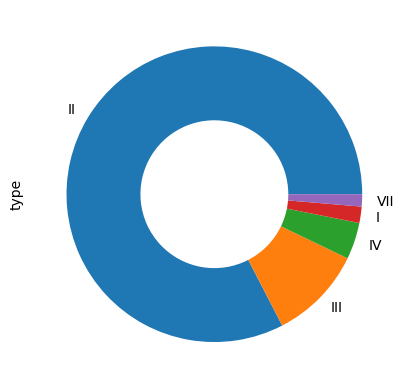

In [16]:
# add number of values to the pie chart


df[df[0].isin(keys_with_pairs)].drop_duplicates(0)["type"].value_counts().plot(
    kind="pie",
    wedgeprops=dict(width=0.5),
)